<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### __Data set de vinos del mundo__

Esta es una versión reducida de la base de datos [winemag-data](https://gist.github.com/clairehq/79acab35be50eaf1c383948ed3fd1129), que contiene una reseña en inglés sobre una gran cantidad de vinos del mundo.

### __Descripción de los campos__

 - **country**: El país de donde proviene el vino
 - **description** : Algunas frases de un sommelier que describen el sabor, olor, apariencia, sensación, etc. del vino.
 - **designation**: La denominación. El viñedo dentro de la bodega de donde proceden las uvas que elaboraron el vino.
 - **points**: la cantidad de puntos que WineEnthusiast calificó al vino en una escala del 1 al 100 (aunque dicen que solo publican reseñas de vinos con una puntuación> = 80).
 - **price**: El costo de una botella de vino.
 - **province**: La provincia o estado de donde proviene el vino
 - **region_1**: el área de cultivo de vino en una provincia o estado (es decir, Napa)
 - **region_2**: a veces hay regiones más específicas, especificadas dentro de un área de cultivo del vino (es decir, Rutherford dentro del Valle de Napa), pero este valor a veces puede estar en blanco.
 - **taster_name**: nombre de la persona que probó y revisó el vino.
 - **taster_twitter_handle**: identificador de Twitter para la persona que probó y revisó el vino.
 - **title**: el título de la reseña de vinos, que a menudo contiene la cosecha si está interesado en extraer esa característica.
 - **variety**: la variedad: el tipo de uva utilizada para elaborar el vino (es decir, Pinot Noir).
 - **winery**: la bodega que hizo el vino.

### TEST

In [2]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP_2022/main/01%20Programaci%C3%B3n%20en%20Python/data/winemag-data-less.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.2M  100 23.2M    0     0  11.0M      0  0:00:02  0:00:02 --:--:-- 11.0M


In [3]:
# leemos el dataframe usando read_csv
df = pd.read_csv("winemag-data-less.csv")
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59995 entries, 0 to 59994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59995 non-null  int64  
 1   country                59964 non-null  object 
 2   description            59995 non-null  object 
 3   designation            42728 non-null  object 
 4   points                 59995 non-null  int64  
 5   price                  55750 non-null  float64
 6   province               59964 non-null  object 
 7   region_1               50163 non-null  object 
 8   region_2               23068 non-null  object 
 9   taster_name            47586 non-null  object 
 10  taster_twitter_handle  45381 non-null  object 
 11  title                  59995 non-null  object 
 12  variety                59995 non-null  object 
 13  winery                 59995 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 6.4+

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [4]:
#Tiremos la columna Unnamed
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


### __Veamos cuantas reseñas de vinos mexicanos tenemos.__

#### &#9758; Construye una nueva Tabla con las reseñas de vinos mexicanos. 
- Quédate **sólo** con las siguientes columnas: `['country','winery','variety','description','points','price']`
- Haz que el índice se reinicie en 0.
- Guarda este DataFrame en la variable vinosMX.

In [5]:
"""
SECUENCIA:
1. Ubicar todos los registros de México usando indexación booleana
2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
3. Reiniciar el índice usando reset_index()
4. Tirar (drop) la nueva columna index 
5. Asignar el resultado de este proceso a la variable vinosMX
"""
# TU CODIGO
# 1. Ubicar todos los registros de México usando indexación booleana
vinosMX = df[df['country']=='Mexico']

# 2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
vinosMX = vinosMX[['country','winery','variety','description','points','price']]

# 3. Reiniciar el índice usando reset_index()
vinosMX = vinosMX.reset_index()

# 4. Tirar (drop) la nueva columna index 
vinosMX = vinosMX.drop('index',axis=1)
vinosMX

,country,winery,variety,description,points,price
0,Mexico,L.A. Cetto,Nebbiolo,"The color is appropriately light, the aromas a...",88,18.0
1,Mexico,Monte Xanic,Sauvignon Blanc,"Sauvignon Blanc is, in general, one of Baja's ...",87,15.0
2,Mexico,L.A. Cetto,Cabernet Sauvignon,"Aromas of mature Cabernet: cassis, tobacco lea...",87,18.0
3,Mexico,Cava Aragon,Nebbiolo,"While this is fiery on the nose, you also get ...",88,27.0
4,Mexico,L.A. Cetto,Petite Sirah,"Dark and earthy, slightly pruny and alcoholic,...",83,8.0
5,Mexico,Hacienda La Lomita,Rosé,Oxidized cherry and strawberry aromas settle o...,83,21.0
6,Mexico,Monte Xanic,Cabernet Franc,"With aromas of salsa, chili peppers and tomato...",86,39.0
7,Mexico,Tres Valles,Sauvignon Blanc,Mild hints of tropical fruit are less than con...,84,15.0
8,Mexico,Unión de Productores del Valle (UPVG),Red Blend,"This odd blend of Barbera, Cabernet Sauvignon,...",83,22.0
9,Mexico,Monte Xanic,Red Blend,This Cabernet blend is one of Baja's best reds...,90,56.0


### __Veamos cuantas reseñas de vinos por país tenemos.__

#### &#9758; Muestra en una gráfica de barras la distribución del número de reseñas por país (_top 10_). 

#### Puedes auxiliarte con alguna de estos métodos de Pandas:
 - [pandas.DataFrame.count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)
 - [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
 - [pandas.Series.index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html)
 - [pandas.Series.values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.values.html)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


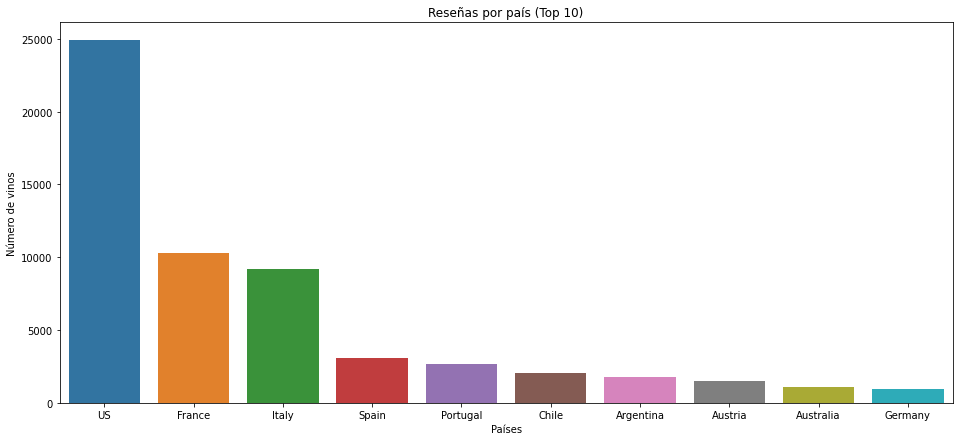

In [6]:
"""
SECUENCIA:
1. Ubicar el nombre de la columna de país
2. Sobre esta columna, obtener la Serie correspondiente
3. Hacer un conteo de los valores únicos sobre esta Serie

4. X en la gráfica de barras son los países (índice de la Serie)
5. Y en la gráfica de barras son los conteos por país (values de la Serie)
6. Usar Seaborn para graficar el diagrama de barras
7. Rotular la gráfica y los ejes
"""
# 1. Ubicar el nombre de la columna de país
# 2. Sobre esta columna, obtener la Serie correspondiente
# 3. Hacer un conteo de los valores únicos sobre esta Serie
conteos=df.country.value_counts()

# 4. X en la gráfica de barras son los países (índice de la Serie)
# 5. Y en la gráfica de barras son los conteos por país (values de la Serie)
x = conteos.index
y = conteos.values

plt.figure(figsize=(16,7))
sns.barplot(x[:10], y[:10]) #primero diez datos

# En una sola línea:
#sns.barplot(df.country.value_counts().index[:10], df.country.value_counts().values[:10])

plt.xlabel("Países")
plt.ylabel("Número de vinos")
plt.title("Reseñas por país (Top 10)")

plt.show()

### __Veamos ahora cuál es el precio promedio por cada país.__

#### &#9758; Muestra en una gráfica de barras el precio promedio por país, en orden descendente (_top 10_). 

Puedes consultar:
 - [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

#### &#9758; ¿Cuál sería el precio promedio por variedad? 

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


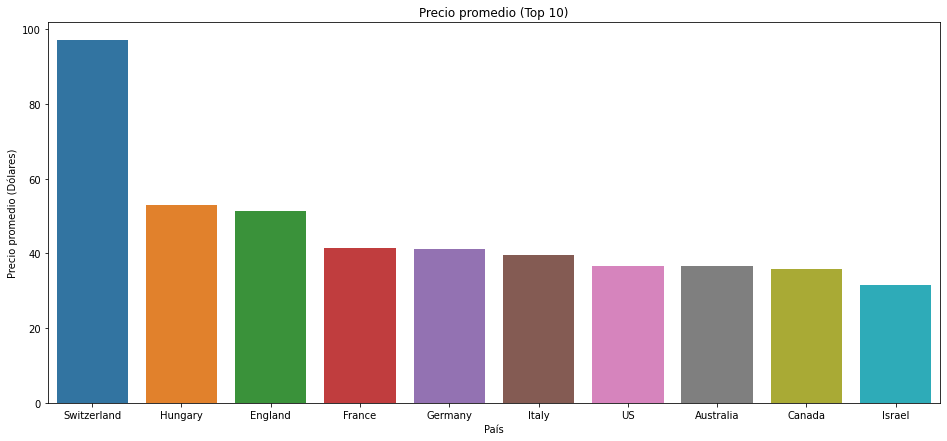

In [7]:
"""
SECUENCIA:
1. Agrupar por pais
2. Elegir la columna precio
3. Sacar el promedio
4. Ordenar de mayor a menor 
LA JERAQUÍA SI IMPORTA CUANDO EL DATASET ES ENORME

"""
#promedios = df.groupby('country').mean()['price'].sort_values(ascending=False) SOLO VISUALMENTE SE VE IGUAL
promedios = df.groupby('country')['price'].mean().sort_values(ascending=False)
#promedios = df.groupby('country).mean().price.sort_values(ascending=False) solución de profesor

x= promedios.index
y= promedios.values



plt.figure(figsize=(16,7))

sns.barplot(x[:10], y[:10])

plt.xlabel("País")
plt.ylabel("Precio promedio (Dólares)")
plt.title("Precio promedio (Top 10)")

plt.show()

#### Agregando anotaciones a nuestros gráficos

Es posible agregar información a nuestros gráficos, en forma de texto, o dibujos (e.g. flechas, líneas, círculos, etc.). Para ello, se utiliza la anotación (annotate) de ejes (axes). Detallar aquí cómo funciona nos llevaría mucho tiempo. Puedes consultar la documentación en estas ligas:

- [matplotlib.Artist](https://matplotlib.org/3.3.3/api/artist_api.html#matplotlib.artist.Artist)
    - [Artist tutorial](https://matplotlib.org/3.3.3/tutorials/intermediate/artists.html)
- [matplotlib.axes](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Patch](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Rectangle](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html)
- [matplotlib.pyplot.annotate](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.annotate.html)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


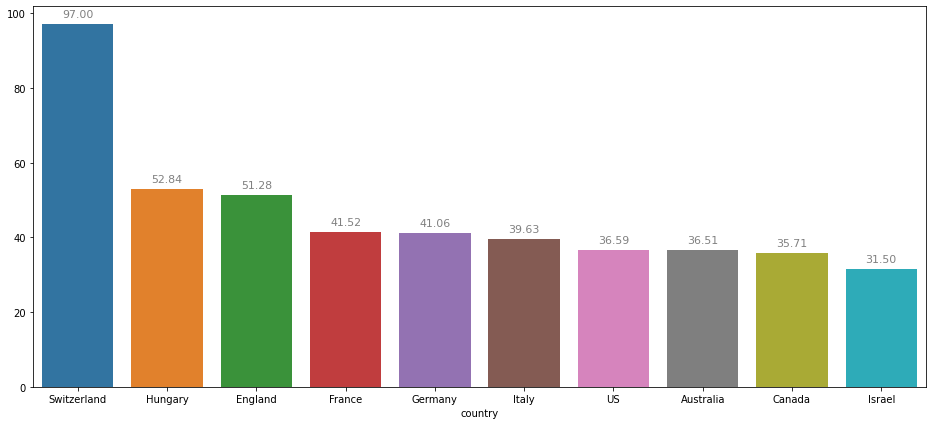

In [8]:
#Definimos el tamaño del canvas
plt.figure(figsize=(16,7))

# la variable "ax" (axes) contiene la información  del gráfico de barras.
# En particular, contiene todo lo relativo a los parches (rectángulos) del barplot.
ax = sns.barplot(x[:10], y[:10])

# Recorremos cada rectángulo
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=11, color='gray',\
                xytext=(0, 10),\
                textcoords='offset points')
    
plt.show()

### __Ahora queremos darnos una idea de cuáles podrían ser los países cuyos vinos tienen una mejor razón calidad-precio en promedio.__

#### &#9758; Muestra en una gráfica de barras la razón puntos/precio promedio por país, en orden descendente (_top 10_). Muestra los valores de la razón sobre cada barra. 

✋ __Recuerda que si divides entre 0 o Nan obtendrás inf o nan__
 
🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

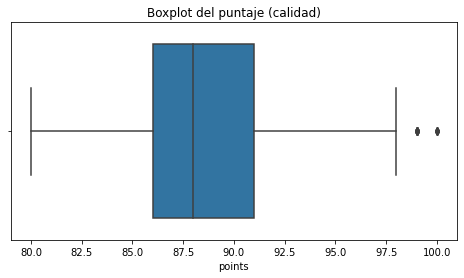

In [9]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df.points)
plt.title("Boxplot del puntaje (calidad)")
plt.show()

In [ ]:
#df.dropna(axis=0, inplace=True)  #Quita todos los NaN
#df['calidad'] = df['points']/df['price']  #Directo la calidad que es puntos sobre precio
#df.calidad


In [10]:
df['calidad'] = df.dropna(axis=0, how = 'any')['points']/(df.dropna(axis=0, how = 'any')['price'])  #en una sola linea
df.calidad

0             NaN
1             NaN
2             NaN
3             NaN
4        1.338462
           ...   
59990         NaN
59991         NaN
59992    1.319444
59993         NaN
59994    1.266667
Name: calidad, Length: 59995, dtype: float64

In [ ]:
df['calidad'] = df.dropna(axis=0, how = 'all')['points']/(df.dropna(axis=0, how = 'all')['price'])
df.calidad

0             NaN
1        5.800000
2        6.214286
3        6.692308
4        1.338462
           ...   
59990    1.727273
59991    0.969388
59992    1.319444
59993    1.000000
59994    1.266667
Name: calidad, Length: 59995, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x360 with 0 Axes>

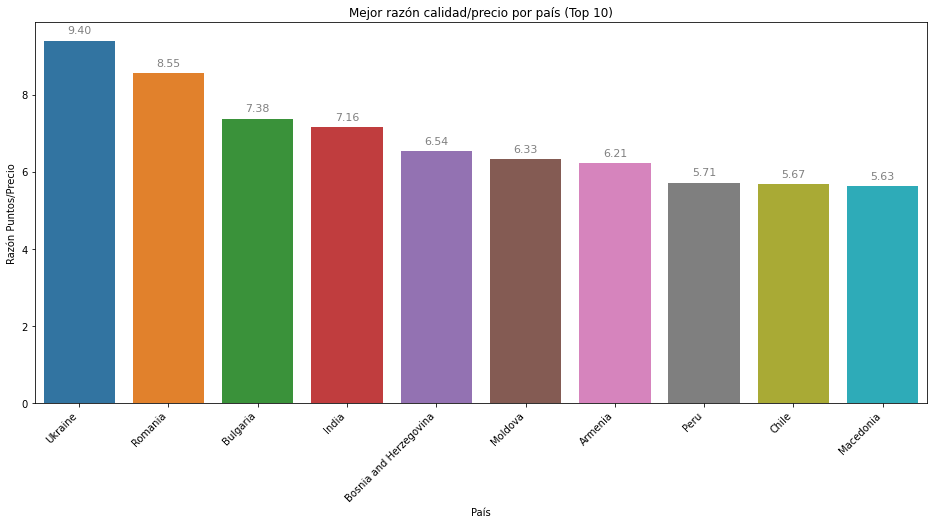

In [11]:
"""
SECUENCIA:
1. Primero quitamos los NAN de points y precio
2. Hacemos la razon que se denomina calidad
(hay varias maneras de hacerlo)


"""
plt.figure(figsize=(10,5))

### TU CODIGO AQUI ##


#promedios = df.groupby('country')['calidad'].mean().sort_values(ascending=False)
#x = promedios.index
#y = promedios.values


df2 = df[np.isfinite(df["price"])].copy()
df2["points/price"] = df2.points / df2.price

promedios = df2.groupby("country").mean().sort_values(by="points/price", ascending=False)["points/price"]

plt.figure(figsize=(16,7))

ax=sns.barplot(promedios.index[:10], promedios.values[:10]) #recupera variable del gráfico


##################### "%.2f flotante"

plt.title("Mejor razón calidad/precio por país (Top 10)")
plt.xlabel("País")
plt.xticks(rotation= 45, ha="right")
plt.ylabel("Razón Puntos/Precio")

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                 textcoords='offset points')
plt.show()

In [12]:
print(promedios)

country
Ukraine                   9.400000
Romania                   8.549444
Bulgaria                  7.375277
India                     7.162500
Bosnia and Herzegovina    6.538462
Moldova                   6.325976
Armenia                   6.214286
Peru                      5.714683
Chile                     5.669034
Macedonia                 5.630556
Cyprus                    5.595364
Georgia                   5.575287
Portugal                  5.525146
Slovakia                  5.437500
Argentina                 5.258749
South Africa              4.980779
Spain                     4.940111
Greece                    4.791164
Morocco                   4.656111
Serbia                    4.346813
Slovenia                  4.324394
Czech Republic            4.227778
Croatia                   4.191445
Australia                 4.181806
New Zealand               4.174391
Uruguay                   4.170199
Brazil                    4.161562
Luxembourg                4.037002
Mexico      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


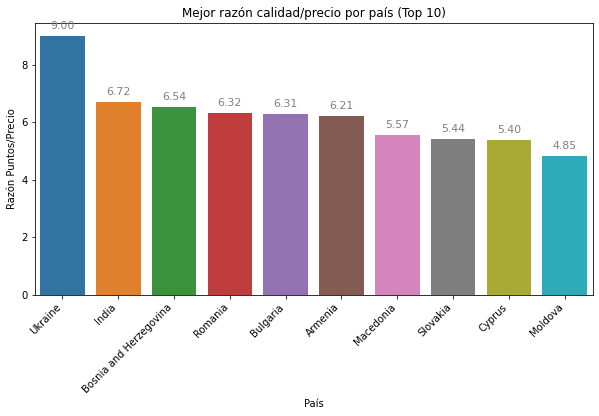

In [13]:
plt.figure(figsize=(10,5))

# NO LE IMPORTA SI EN LA COLUMNA HAY NAN, segunda opcion de hacerlo

### TU CODIGO AQUI ##
promedios = df.groupby('country')['points'].mean() /  df.groupby('country')['price'].mean()
#print(promedios)
promedios = promedios.sort_values(ascending = False)

x = promedios.index[:10]
y = promedios.values[:10]

#print(promedios)
ax = sns.barplot(x,y)

#####################

plt.title("Mejor razón calidad/precio por país (Top 10)")
plt.xlabel("País")
#rotación de etiquetas
plt.xticks(rotation= 45, ha="right")
plt.ylabel("Razón Puntos/Precio")

#"%.2f es flotante"
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                 textcoords='offset points')
plt.show()


### __¿Qué vinos tienen la mejor puntuación y a qué países pertenecen?__

#### &#9758; Muestra en una gráfica de pastel la proporción de los países que tienen los 20 mejores vinos; es decir, los primeros 20 de mayor puntaje.  

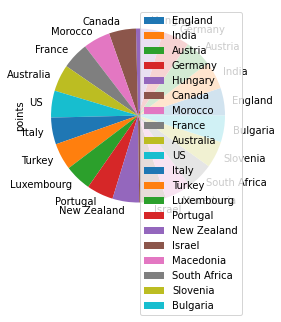

In [14]:
veinte = df.groupby('country')['points'].mean().sort_values(ascending=False).head(20)
veinte = pd.DataFrame(veinte)
veinte

veinte.plot(kind='pie', y='points')

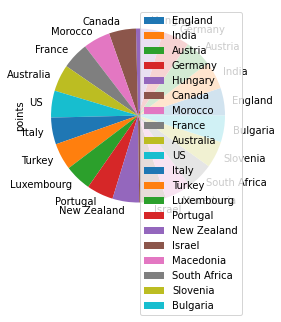

In [15]:
#Se eligen los primeros 20
pd.DataFrame(df.groupby('country')['points'].mean().sort_values(ascending=False).head(20)).plot(kind='pie', y='points')

### __¿Cuáles son las 10 variedades de uva más abundantes y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

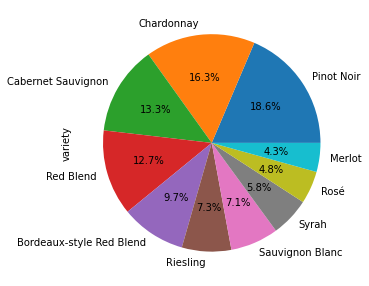

In [ ]:
#solucion profesor
variedades = pd.DataFrame(df["variety"].value_counts().sort_values(ascending=False)[:10]).plot(kind='pie', y='variety', figsize=(5,5), legend=False, autopct="%1.1f%%")







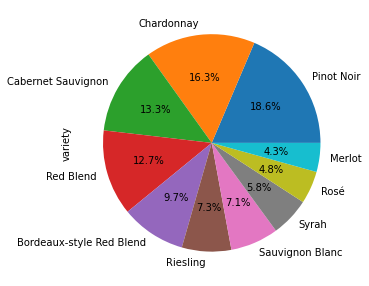

In [16]:
#nuestra solución
variedades =  df.groupby('variety')['variety'].count()
pd.DataFrame(variedades.sort_values(ascending=False).head(10)).plot(kind='pie', y='variety', figsize=(5,5), legend=False, autopct="%1.1f%%")

### __¿Cuáles son las 20 bodegas más mencionadas y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

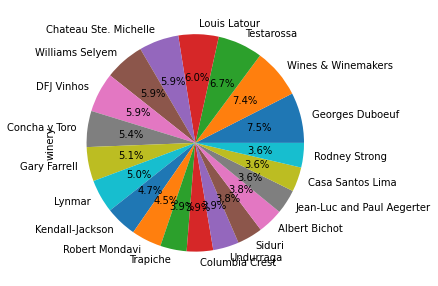

In [17]:
#TU CODIGO
bodegas = df["winery"].value_counts().sort_values(ascending=False).head(20)
pd.DataFrame(bodegas).plot(kind='pie', y='winery', figsize=(5,5), legend=False, autopct="%1.1f%%")


### __Vamos ahora a construir una nueva tabla de información__

#### &#9758; Construye una tabla que muestre país, variedad de uva, bodega, y valores de puntuación y precio.
- Considera las 10 variedades de uva y las 20 bodegas más importantes.
- Haz una tabla con estos datos y sólo los valores de país, bodega, variedad, puntuación y precio correspondientes.
- Agrega una columna con el valor de puntos/precio
- Cambia el nombre de la bodega para que éste incluya su país de origen.
- Ordena los datos por nombre de país, variedad y bodega (orden ascendente).

In [26]:
#TU CODIGO
#<COMPLETA>  #nuevo dataFrame que vamos a construir y luego observar
# Se hace tabla de país, variedad de uva, bodega, valores de puntuación y precio
variedades =  df.groupby('variety')['variety'].count()

bodegas = df["winery"].value_counts().sort_values(ascending=False).head(20)

p_v = df[['country', 'variety', 'winery', 'points', 'price']]
pp=p_v.value_counts('variety').head(10).index
pp4 = pd.DataFrame(p_v[p_v['variety'].isin(pp)])

pp4['razon']=pp4.points/pp4.price
pp4["winery"] = pp4["winery"] +'/'+ pp4["country"]
pp5=pp4.sort_values(by=['country', 'variety', 'winery'],ascending=[True, True, True])
pp5.dropna(subset = ['country','variety', 'winery', 'price', 'points'], inplace=True)
pp5

,country,variety,winery,points,price,razon
910,Argentina,Bordeaux-style Red Blend,Antucura/Argentina,87,30.0,2.900000
1195,Argentina,Bordeaux-style Red Blend,Antucura/Argentina,87,20.0,4.350000
21327,Argentina,Bordeaux-style Red Blend,Antucura/Argentina,86,20.0,4.300000
23077,Argentina,Bordeaux-style Red Blend,Bodega Calle/Argentina,90,21.0,4.285714
6846,Argentina,Bordeaux-style Red Blend,Bodega Norton/Argentina,91,23.0,3.956522
...,...,...,...,...,...,...
6969,Uruguay,Red Blend,Viñedo de los Vientos/Uruguay,86,23.0,3.739130
20966,Uruguay,Rosé,Artesana/Uruguay,85,14.0,6.071429
10586,Uruguay,Rosé,Marichal/Uruguay,84,20.0,4.200000
51462,Uruguay,Rosé,Marichal/Uruguay,84,20.0,4.200000


#### &#9758; Observa la relación puntos-precio por país

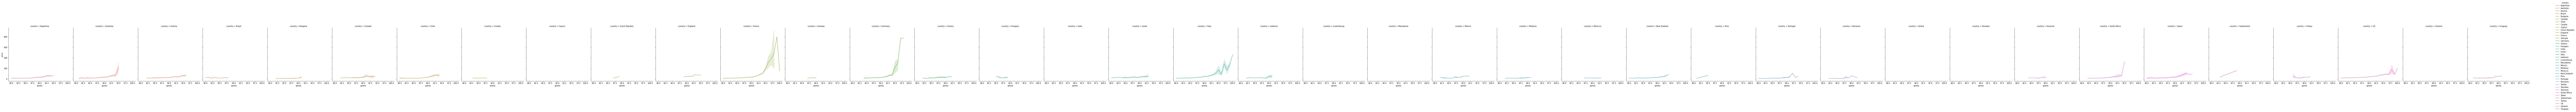

In [27]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=pp5)

#### &#9758; Observa las distribuciones por pares en función de la variedad de uva.

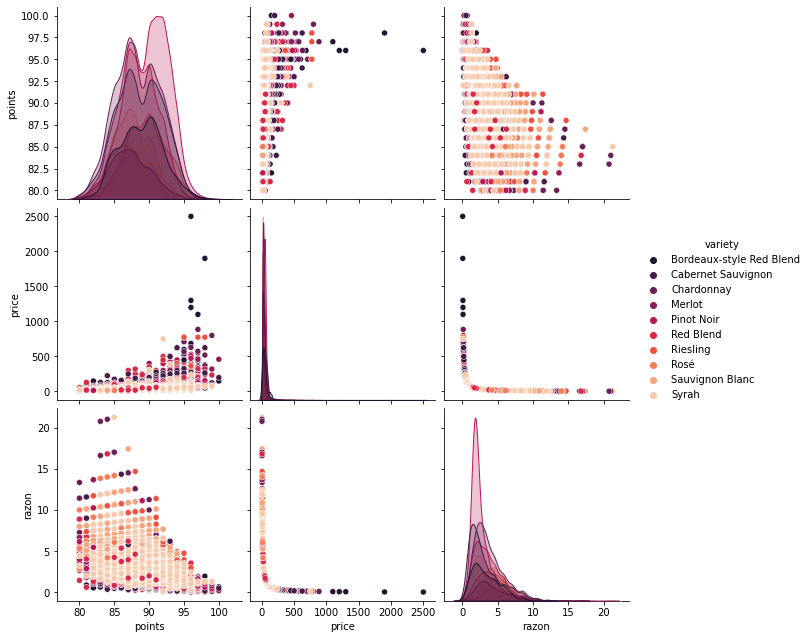

In [29]:
sns.pairplot(pp5, hue="variety",height=3,palette='rocket')

#### &#9758; Observa las distribuciones por pares en función del país.

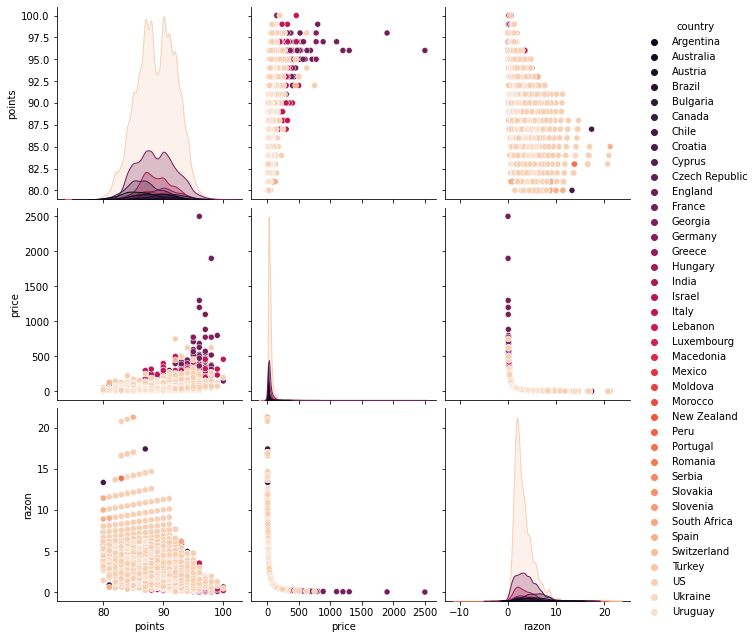

In [30]:
sns.pairplot(pp5, hue="country",height=3,palette='rocket')


#### &#9758; Observa las distribuciones por pares en función de la bodega.

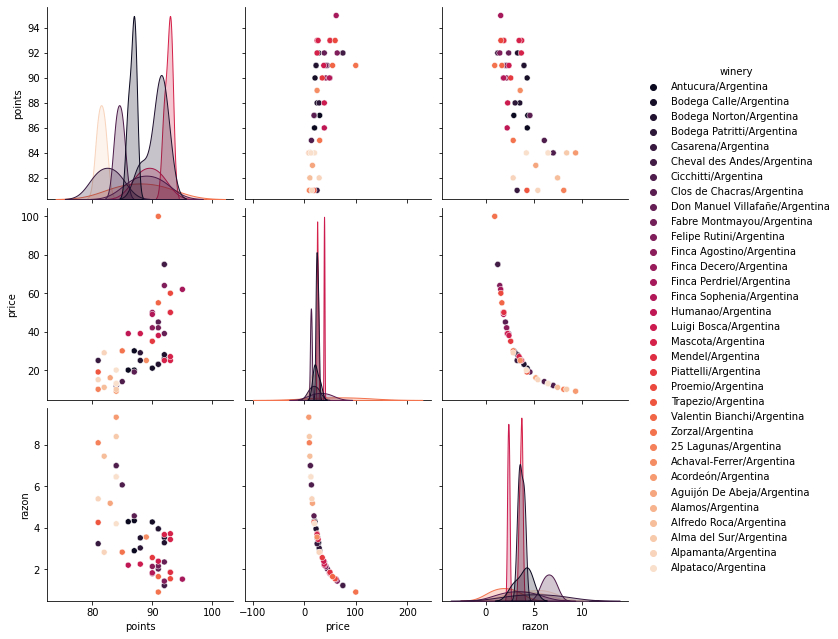

In [33]:
pp5v = pp5.head(50)
sns.pairplot(pp5v, hue="winery",height=3,palette='rocket')


#### &#9758; Observa las distribuciones (scatter) de precio por variedad de uva.

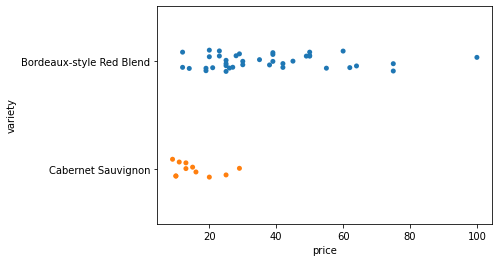

In [34]:
sns.stripplot(x="price", y="variety", data=pp5v)

#### &#9758; Observa las distribuciones (scatter) de precio por bodega.

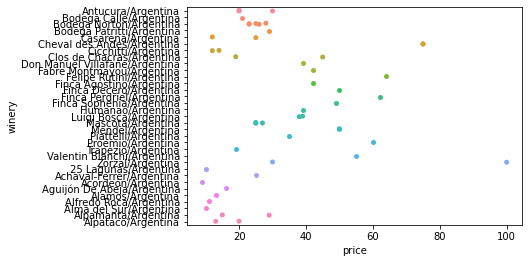

In [35]:
sns.stripplot(x="price", y="winery", data=pp5v)

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.

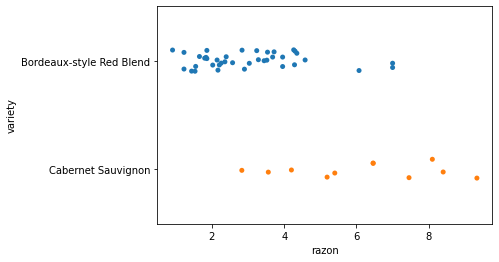

In [36]:
pp5_50 = pp5.head(50)
sns.stripplot(x="razon", y="variety", data=pp5_50)

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por país.

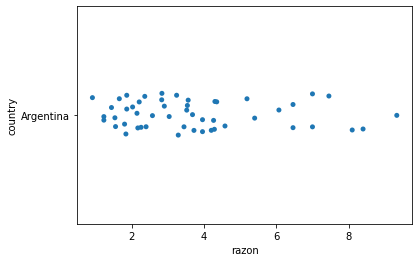

In [38]:
sns.stripplot(x="razon", y="country", data=pp5_50)

### __Agrega los datos de México a esta última tabla de información__

#### &#9758; Une la tabla de vinosMX a la tabla p_v
- Asegúrate de __no agregar__ la columna de descripción 

In [82]:
vinosMX_copia = vinosMX.copy()
vinosMX_copia.drop(['description'], axis=1)

df3 = vinosMX_copia.merge(pp5, how="outer")
df3.drop(['description'], axis=1)


,country,winery,variety,points,price,razon
0,Mexico,L.A. Cetto,Nebbiolo,88,18.0,NaN
1,Mexico,Monte Xanic,Sauvignon Blanc,87,15.0,NaN
2,Mexico,L.A. Cetto,Cabernet Sauvignon,87,18.0,NaN
3,Mexico,Cava Aragon,Nebbiolo,88,27.0,NaN
4,Mexico,L.A. Cetto,Petite Sirah,83,8.0,NaN
...,...,...,...,...,...,...
30901,Uruguay,Viñedo de los Vientos/Uruguay,Red Blend,86,23.0,3.739130
30902,Uruguay,Artesana/Uruguay,Rosé,85,14.0,6.071429
30903,Uruguay,Marichal/Uruguay,Rosé,84,20.0,4.200000
30904,Uruguay,Marichal/Uruguay,Rosé,84,20.0,4.200000


#### &#9758; Calcula los valores de points/price para los vinos de México
- TIP: Usa el método apply sobre `df3[['points','price','points/price']]`

In [92]:
f = lambda x: x[0]/x[1]
df3['razon'] = df3[['points','price','razon']].apply(f, axis=1)
df3

,country,winery,variety,points,price,razon
0,Mexico,L.A. Cetto,Nebbiolo,88,18.0,4.888889
1,Mexico,Monte Xanic,Sauvignon Blanc,87,15.0,5.800000
2,Mexico,L.A. Cetto,Cabernet Sauvignon,87,18.0,4.833333
3,Mexico,Cava Aragon,Nebbiolo,88,27.0,3.259259
4,Mexico,L.A. Cetto,Petite Sirah,83,8.0,10.375000
...,...,...,...,...,...,...
30901,Uruguay,Viñedo de los Vientos/Uruguay,Red Blend,86,23.0,3.739130
30902,Uruguay,Artesana/Uruguay,Rosé,85,14.0,6.071429
30903,Uruguay,Marichal/Uruguay,Rosé,84,20.0,4.200000
30904,Uruguay,Marichal/Uruguay,Rosé,84,20.0,4.200000


#### &#9758; Observa la relación puntos-precio por país

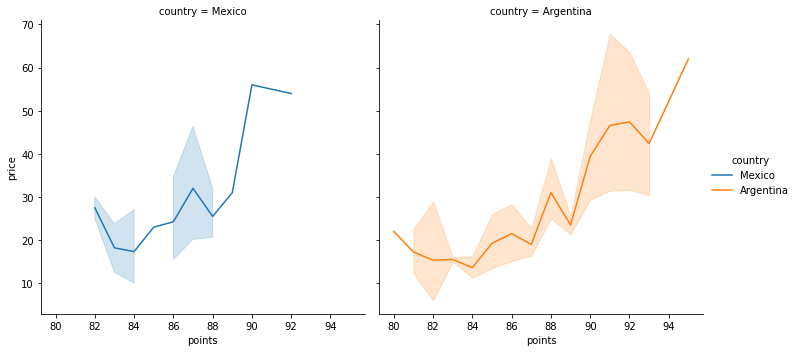

In [65]:
dff3 = df3.head(100)
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=dff3)

#### &#9758; Observa las distribuciones por pares en función del país.
- Construye una tabla auxiliar "mx_top", donde los datos de México (en df3) aparezcan al final de la tabla mx_top.

     country                   winery  ...     razon points/price
0  Argentina       Antucura/Argentina  ...  2.900000     2.900000
1  Argentina       Antucura/Argentina  ...  4.350000     4.350000
2  Argentina       Antucura/Argentina  ...  4.300000     4.300000
3  Argentina   Bodega Calle/Argentina  ...  4.285714     4.285714
4  Argentina  Bodega Norton/Argentina  ...  3.956522     3.956522

[5 rows x 8 columns]


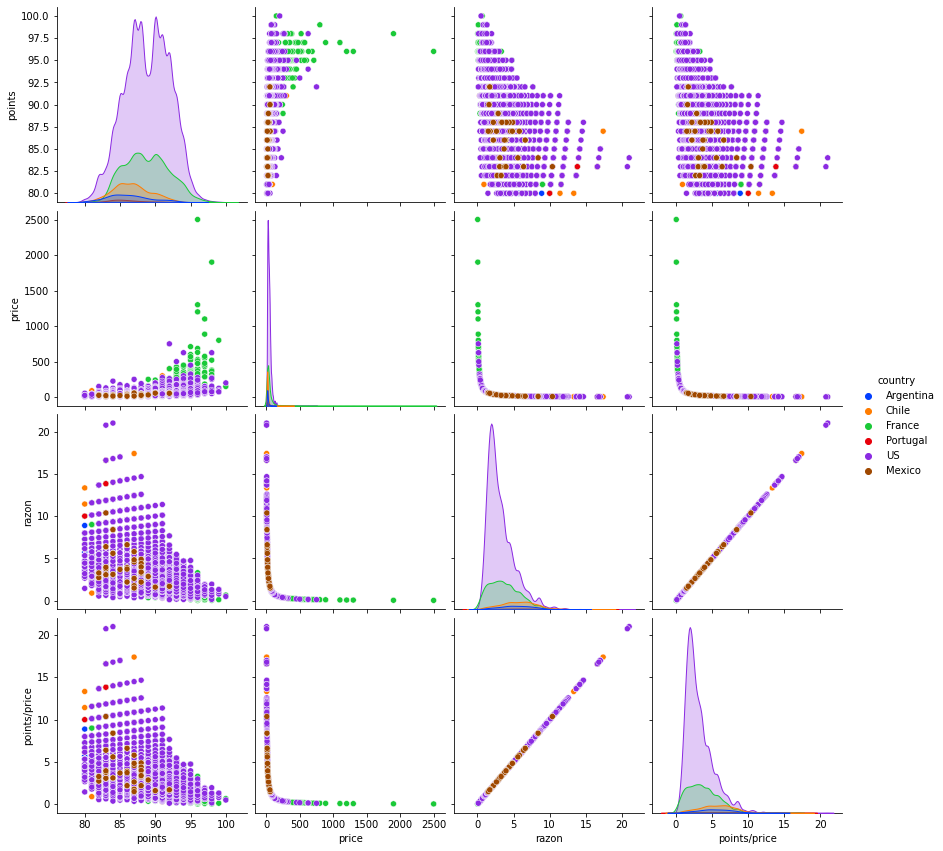

In [66]:
mx_top = df3.set_index(['country']).loc[['Argentina','Chile','France','Portugal','US','Mexico']].reset_index()
#vinosMX_copia.merge(pp5, how="inner")
print(mx_top.head(5))
sns.pairplot(mx_top, hue="country",height=3,palette='bright')

#### &#9758; Observa las distribuciones (scatter) de puntos por país.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

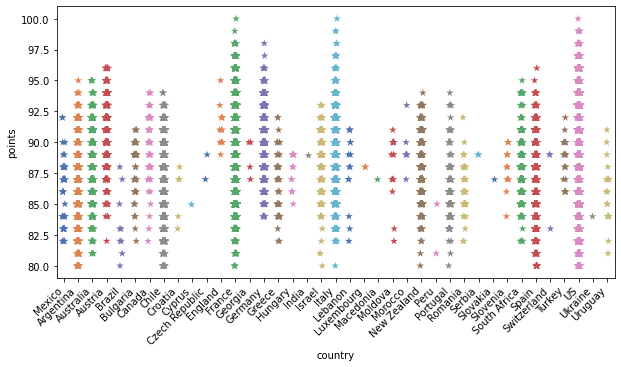

In [67]:
plt.figure(figsize=(10,5))
sns.stripplot(x="country", y="points", data=df3,dodge=True,palette='deep',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de precios por bodega.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

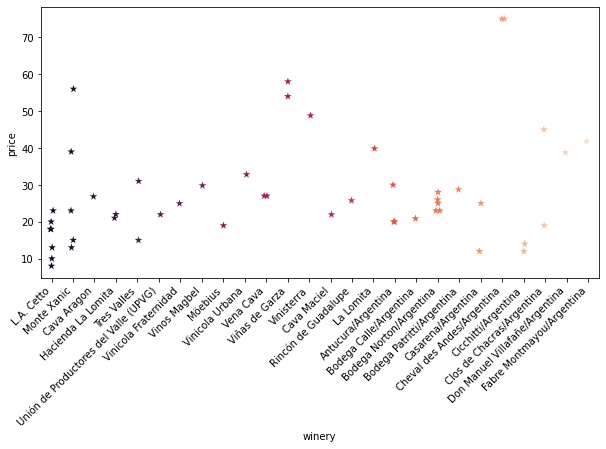

In [68]:
dff3 = df3.head(50)
plt.figure(figsize=(10,5))
sns.stripplot(x="winery", y="price", data=dff3,dodge=True,palette='rocket',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.
- Dibuja una línea que marque el promedio de todos los datos
- Dibuja marcas ubicadando los valores promedio por cada bodega (TIP: usa `groupby` sobre país y bodega para calcular primero los valores promedio)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

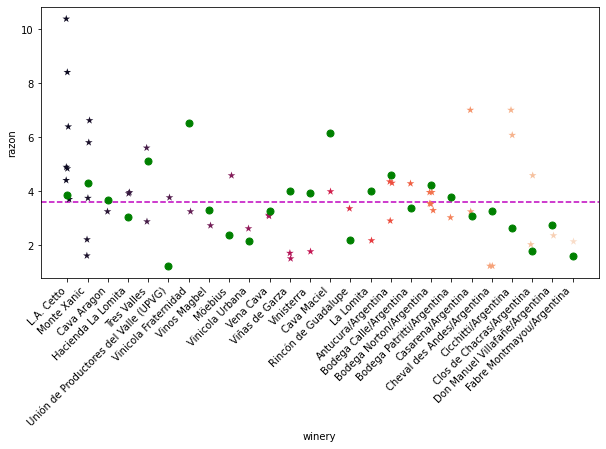

In [69]:
plt.figure(figsize=(10,5))

medias = dff3.groupby(['country','winery'])['razon'].mean().values

sns.stripplot(x='winery', y='razon', data=dff3,dodge=True,palette='rocket',marker='*',size=8)

promedio = df3['razon'].mean()
plt.axhline(promedio, ls='--',color='m')

x = plt.xticks()[0]
puntos = [[x,y] for x,y in zip(x, medias)] 

for punto in puntos:
    plt.plot(punto[0],punto[1],'o',color='g',ms=7,zorder=10)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Si consideramos la proporción de los países con mejor relación puntos/precio, ¿cómo queda México?
- Usa un gráfico de pastel

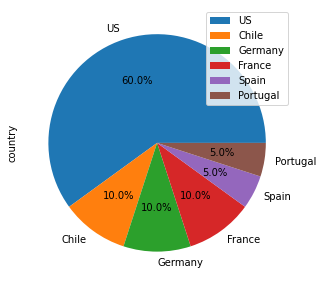

In [98]:
mejores = df3.sort_values(by='razon', ascending=False).head(20)
mejor = mejores.country.value_counts().to_frame()
mejor.plot.pie(y='country', figsize = (5, 5),legend=True,autopct='%1.1f%%')